# Wczytanie bibliotek

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons, make_blobs, load_iris
from kneed import KneeLocator
%matplotlib inline

# Grupowanie k-średnich

### Przykład 1

Dla wygenerowanych danych X wykonaj grupowanie k-średnich dla k=3 i 
przedstaw wyniki na wykresie. Na wykres nanieś także środki znalezionych klastrów.


In [2]:
rng = np.random.default_rng(seed = 7)
X = np.vstack([rng.multivariate_normal([0, 0], [[1,0], [0,1]], 50),
                         rng.multivariate_normal([3,8], [[1,0], [0,1]], 50),
                         rng.multivariate_normal([6,4], [[1,0], [0,1]], 50)])

Dane przed grupowaniem trzeba przeskalować! Żeby wszystkie zmienne były na tej samej skali i równomiernie
wpływały na grupowanie.

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

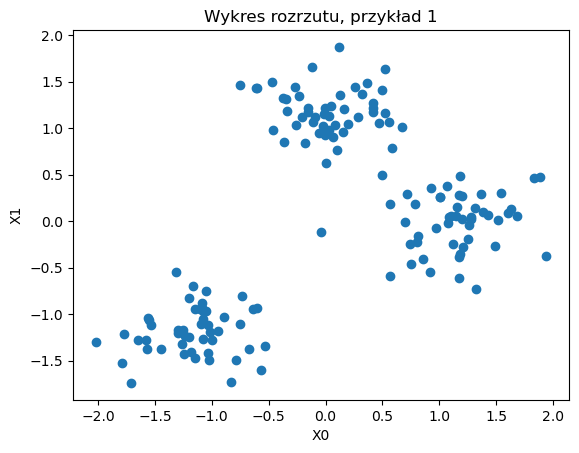

In [5]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.title("Wykres rozrzutu, przykład 1")
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [7]:
model1 = KMeans(n_clusters = 3, n_init = 10, random_state = 17)

In [8]:
model1.fit(X_scaled)

KMeans(n_clusters=3, n_init=10, random_state=17)

In [9]:
labels1 = model1.labels_
print(labels1)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


etykiety nie mają znaczenia, tylko przymależność do grup!!

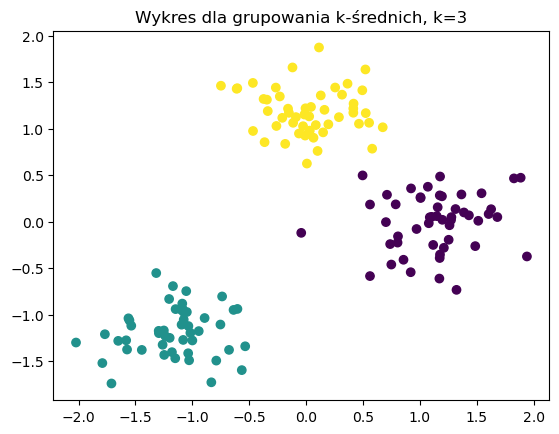

In [10]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c = labels1)
plt.title("Wykres dla grupowania k-średnich, k=3")
plt.show()

In [11]:
print(model1.cluster_centers_)

[[ 1.13618722 -0.00638104]
 [-1.16007584 -1.17607225]
 [ 0.02388862  1.1824533 ]]


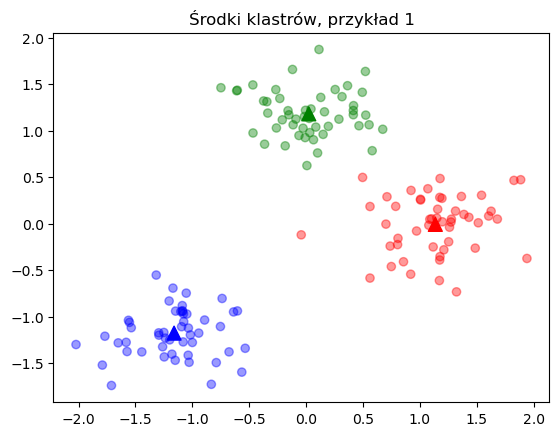

In [12]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c = np.array(["red", "blue", "green"])[np.array(labels1)], alpha = 0.4)
centers1 = model1.cluster_centers_
plt.scatter(centers1[:, 0], centers1[:, 1], marker = "^", c = ["red", "blue", "green"], s = 100)
plt.title("Środki klastrów, przykład 1")
plt.show()

### Zadanie 1: 

Sprawdź jak powyższe dane zostaną pogrupowane dla k=2 i k=5. 

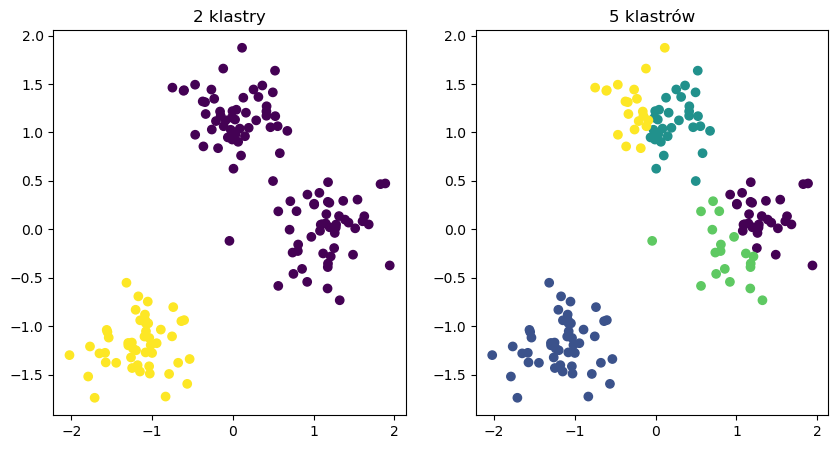

In [13]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))

model2 = KMeans(n_clusters = 2, n_init = 10, random_state = 17)
model2.fit(X_scaled)
labels2 = model2.labels_

model3 = KMeans(n_clusters = 5, n_init = 10, random_state = 17)
model3.fit(X_scaled)
labels3 = model3.labels_

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c = labels2)
axes[0].set_title("2 klastry")
axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c = labels3)
axes[1].set_title("5 klastrów")

plt.show()

## Wybór k

wykres łokcia WSS w zależności od k

In [16]:
wss = []
for i in range(1, 11):
    model = KMeans(n_clusters = i, n_init = 10, random_state = 17)
    model.fit(X_scaled)
    wss.append(model.inertia_)

In [17]:
wss

[299.99999999999994,
 95.33085705631835,
 29.067475523539574,
 24.737281776489898,
 20.781178388691924,
 17.661973074637018,
 15.235285788002392,
 13.26279851382169,
 11.481040333634972,
 9.96360094170186]

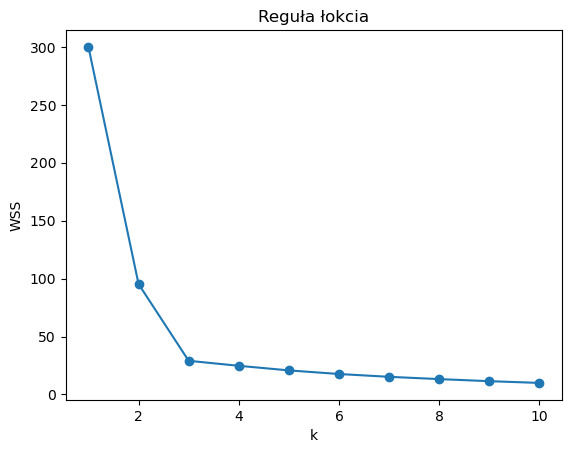

In [18]:
plt.plot(range(1, 11), wss, "-o")
plt.title("Reguła łokcia")
plt.xlabel("k")
plt.ylabel("WSS")
plt.show()

### Przykład 2: Irysy

https://en.wikipedia.org/wiki/Iris_flower_data_set

https://www.math.umd.edu/~petersd/666/html/iris_pca.html

In [24]:
iris = load_iris()

In [25]:
type(iris)

sklearn.utils._bunch.Bunch

In [26]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [27]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


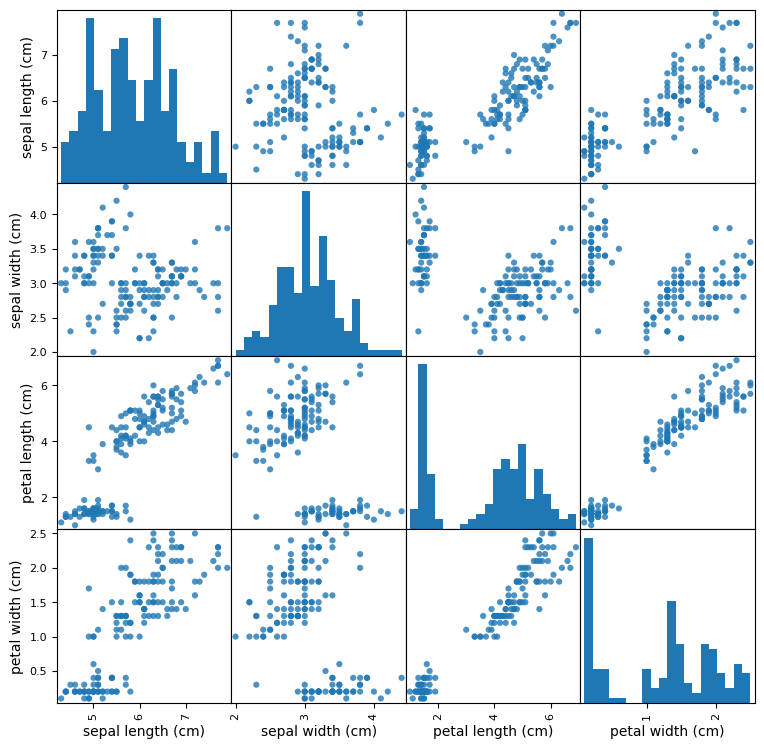

In [29]:
pd.plotting.scatter_matrix(iris_df, figsize = (9,9), marker = "o", hist_kwds = {"bins": 20}, s = 20, alpha = 0.8)
plt.show()

### Zadanie2: Irysy

Dla danych Irysy znajdź liczbę klastrów i wykonaj grupowanie k-średnich. Zwizualizuj wyniki. Skalowanie!!

In [30]:
X_scaled = StandardScaler().fit_transform(iris.data)

In [31]:
wss = []
for i in range(1, 11):
    model = KMeans(n_clusters = i, n_init = 10, random_state = 17)
    model.fit(X_scaled)
    wss.append(model.inertia_)

In [32]:
wss

[600.0,
 222.36170496502308,
 139.8204963597498,
 114.0925469040309,
 90.92751382392052,
 81.58170581536586,
 72.29026587696013,
 62.8661017312956,
 54.92174183982577,
 47.226936026274956]

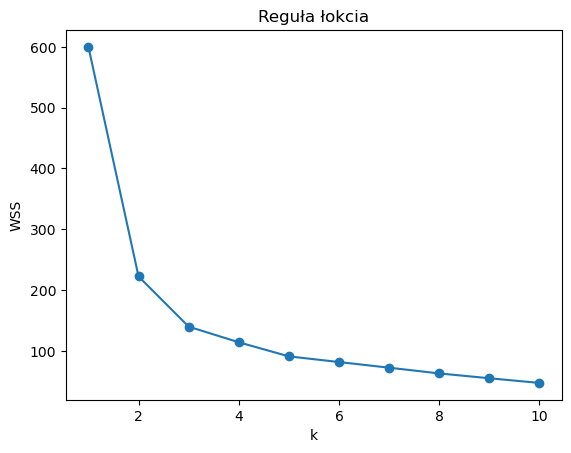

In [33]:
plt.plot(range(1, 11), wss, "-o")
plt.title("Reguła łokcia")
plt.xlabel("k")
plt.ylabel("WSS")
plt.show()

In [35]:
kl = KneeLocator(range(1, 11), wss, curve="convex", direction="decreasing")
kl.elbow

3

In [43]:
model = KMeans(n_clusters = 3, n_init = 10, random_state = 7)
model.fit(X_scaled)
labels = model.labels_

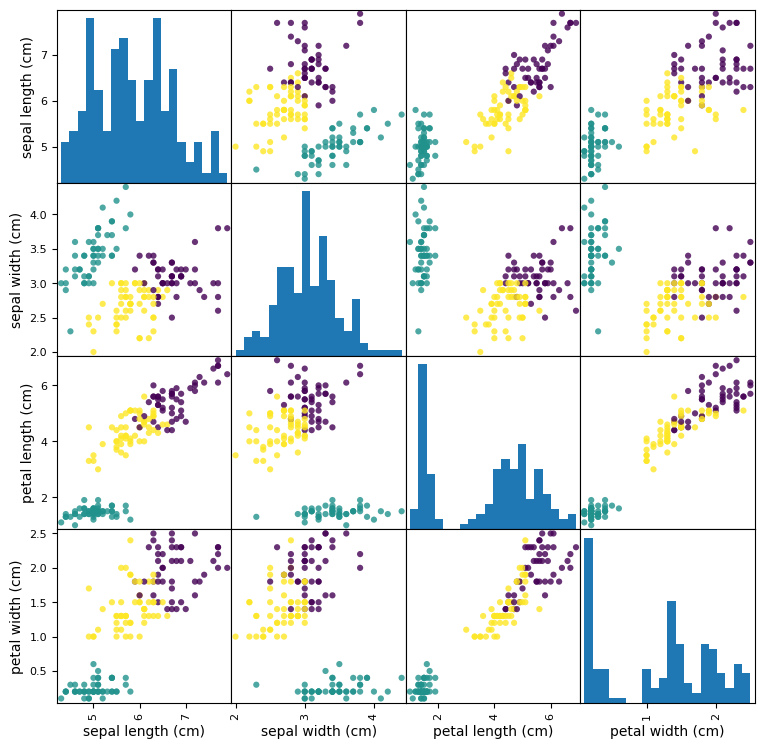

In [37]:
pd.plotting.scatter_matrix(iris_df, figsize = (9,9), marker = "o", hist_kwds = {"bins": 20}, s = 20, alpha = 0.8, c = labels)
plt.show()

Prawdziwe klasy w Irysach - ilustarcja, nie używamy do grupowania!!!

In [38]:
y = iris.target

In [39]:
np.bincount(y)

array([50, 50, 50])

In [40]:
iris.target_names[np.unique(y)]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

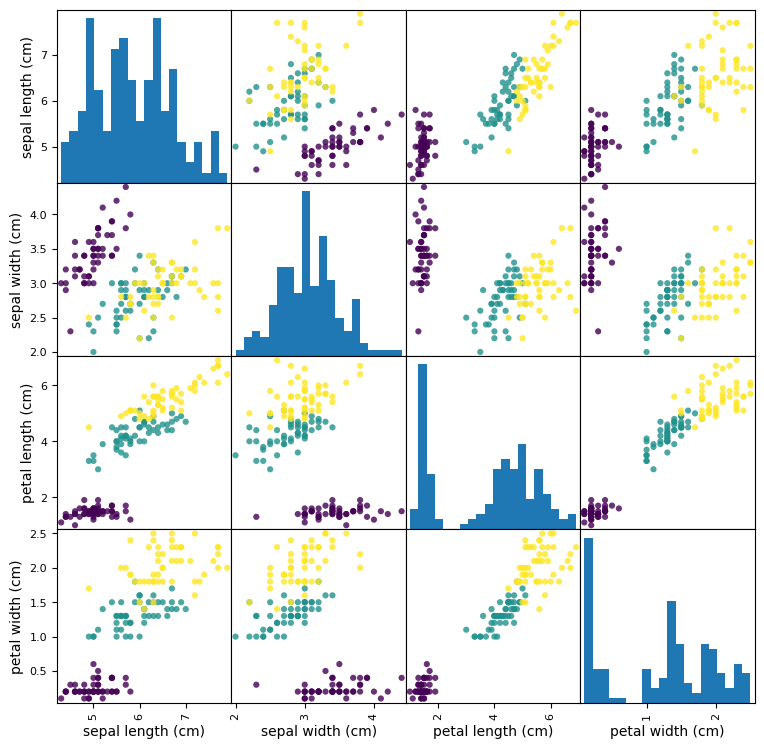

In [41]:
pd.plotting.scatter_matrix(iris_df, figsize = (9,9), marker = "o", hist_kwds = {"bins": 20}, s = 20, alpha = 0.8, c = y)
plt.show()

In [44]:
print(pd.crosstab(labels, y))

col_0   0   1   2
row_0            
0      50   0   0
1       0  39  17
2       0  11  33


### Zadanie 3: awarie k-średnich

Dla danych X1 i X2 wykonaj skalowanie i grupowanie k-średnich dla odpowiedniej liczby grup. Zwizualizuj wyniki. Dlaczego algorytm k-średnich nie poradził sobie z grupowaniem?

In [22]:
n_samples = 500
random_state = 170
noisy_moons = make_moons(n_samples = n_samples, noise = 0.05)
varied_normal = make_blobs(
    n_samples = n_samples, cluster_std=[1.0, 2.5, 0.5], random_state = random_state
)
X1 = noisy_moons[0]
X2 = varied_normal[0]

In [45]:
scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1)

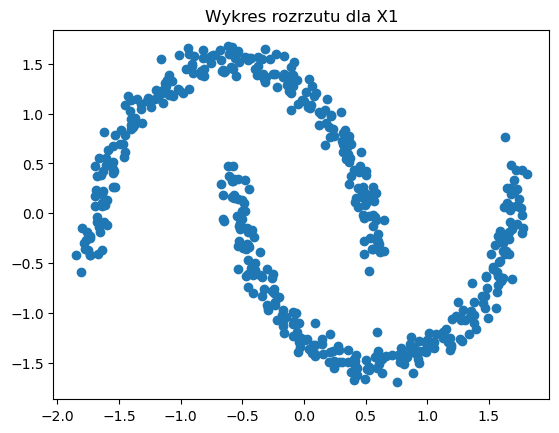

In [46]:
plt.scatter(X1_scaled[:,0], X1_scaled[:, 1])
plt.title("Wykres rozrzutu dla X1")
plt.show()

In [63]:
model1 = KMeans(n_clusters = 2, n_init = 10, random_state = 17)
model1.fit(X1_scaled)

KMeans(n_clusters=2, n_init=10, random_state=17)

In [64]:
labels1 = model1.labels_

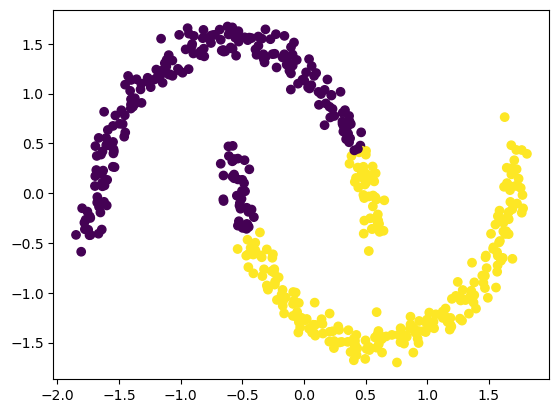

In [65]:
plt.scatter(X1_scaled[:,0], X1_scaled[:,1], c = labels1)
plt.show()

In [55]:
scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)

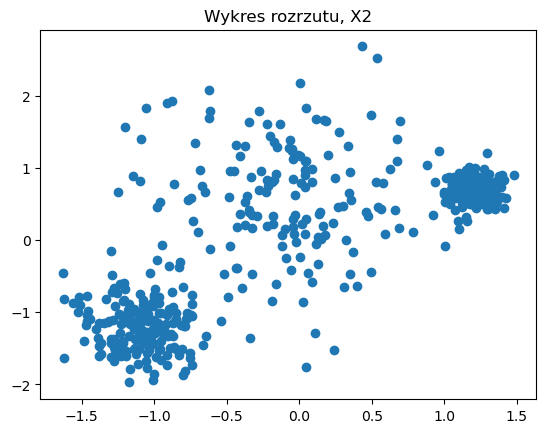

In [56]:
plt.scatter(X2_scaled[:, 0], X2_scaled[:, 1])
plt.title("Wykres rozrzutu, X2")
plt.show()

In [57]:
model2 = KMeans(n_clusters = 3, n_init = 10, random_state = 17)
model2.fit(X2_scaled)

KMeans(n_clusters=3, n_init=10, random_state=17)

In [58]:
labels2 = model2.labels_

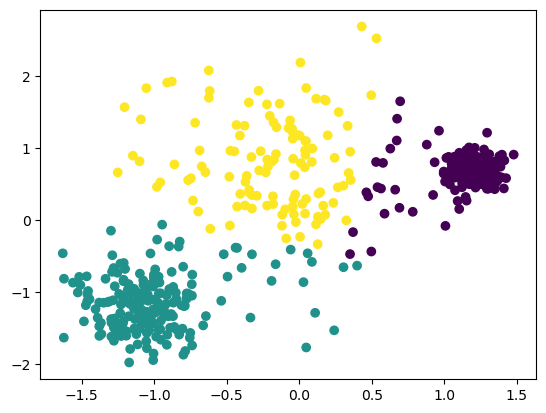

In [59]:
plt.scatter(X2_scaled[:,0], X2_scaled[:,1], c = labels2)
plt.show()

Obejrzyj inne przykładowe zbiory danych i sprawdź jak radzi sobie z nimi algorytm k-średnich (MiniBatch Kmeans). 

https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html